## Subject: Data Analysis Mathematics, Algorithms and Modeling  
**Subject Code:** PROG8431  

### Group 4 – Team Members
- **Manu Mathew** – 8990691  
- **Yogesh Kumar Gopal** – 8996403  
- **Jahnavi Pakanati** – 9013742  

---

### **Project Summary**

This project looks at census income data to better understand what factors might affect a person’s income. It involves cleaning and organizing the data, calculating important statistics like averages and ranges, and creating visual charts such as histograms, scatter plots, and boxplots. The goal is to explore how different characteristics like age, education, and work hours relate to income levels and help in predicting income.

- Link to dataset : <ins>https://archive.ics.uci.edu/dataset/2/adult</ins>


##### Adding imports

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn
from matplotlib_venn import venn2

print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"matplotlib-venn: {matplotlib_venn.__version__}")

pandas: 2.2.3
matplotlib: 3.10.3
seaborn: 0.13.2
matplotlib-venn: 1.1.2


#### Class that loads the data, cleans, calculates mean, median, mode, standard deviation and quartiles and then, display the data with a scatter plot, a histogram, a box-whisker plot, and a Venn Diagram and also present a numerical summary of the data

In [2]:
class IncomeDataAnalysis:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.excluded_columns = ['education_id', 'occupation_id', 'marital_id']
        self.excluded_columns_mode = ['capital_gain', 'capital_loss']

    # method that loads the data
    def load_data(self):
        self.df = pd.read_csv(self.data_path, header=None, sep=",")
        self.df.columns = [
            "age", "workclass", "fnlwgt", "education", "education_num",
            "marital_status", "occupation", "relationship", "race", "sex",
            "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
        ]
        self.df.to_csv('./csv/temp_data.csv', index=False)
        return self.df

    # method that cleans the data
    def clean_data(self):
        self.df = self.df.drop(columns=["fnlwgt"])
        self.df = self.df.map(lambda x: 'NaN' if str(x).strip() in ['?', ''] else x)

    # method that normalizes the education columns and maps to cleaned data
    def normalize_education(self):
        education_map = self.df[["education", "education_num"]].drop_duplicates().reset_index(drop=True)
        education_map["education_id"] = education_map.index + 1
        education_map.to_csv("./csv/education.csv", index=False)
        self.df = self.df.merge(education_map, on=["education", "education_num"], how="left")
        self.df = self.df.drop(columns=["education", "education_num"])

    # method that normalizes the marital status columns and maps to cleaned data
    def normalize_marital_status(self):
        marital_map = pd.DataFrame(self.df["marital_status"].drop_duplicates().reset_index(drop=True))
        marital_map["marital_id"] = marital_map.index + 1
        marital_map.to_csv("./csv/marital_status.csv", index=False)
        self.df = self.df.merge(marital_map, on="marital_status", how="left")
        self.df = self.df.drop(columns=["marital_status"])

    # method that normalizes the occupation columns and maps to cleaned data
    def normalize_occupation(self):
        occupation_map = pd.DataFrame(self.df["occupation"].drop_duplicates().reset_index(drop=True))
        occupation_map["occupation_id"] = occupation_map.index + 1
        occupation_map.to_csv("./csv/occupation.csv", index=False)
        self.df = self.df.merge(occupation_map, on="occupation", how="left")
        self.df = self.df.drop(columns=["occupation"])

    # method that converts the final cleaned data to .csv
    def convert_final_csv(self):
        return self.df.to_csv('./csv/final_data.csv', index=False)


    # method that calculates the mean, median and mode, variance and standard deviation along with quartiles
    def get_statistics(self):
        print("Mean:\n", self.df.drop(columns=self.excluded_columns, errors='ignore').mean(numeric_only=True))
        print("Median:\n", self.df.drop(columns=self.excluded_columns, errors='ignore').median(numeric_only=True))
        print("Mode:\n", self.df.drop(columns=self.excluded_columns_mode, errors='ignore').mode(numeric_only=True))
        print("Variance:\n", self.df.var(numeric_only=True))
        print("Standard Deviation:\n", self.df.std(numeric_only=True))
        print("Quartiles:\n", self.df.quantile([0.25, 0.5, 0.75], numeric_only=True))

    # method that calculates the mean, median and mode, variance and standard deviation along with quartiles
    def plot_scatter_age_vs_hours(self):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x='age', y='hours_per_week', hue='income', data=self.df)
        plt.title('Age vs Hours-per-week')
        plt.show()

    # method that displays the histogram
    def age_distribution(self):
        plt.figure(figsize=(6,4))
        self.df['age'].hist(bins=15)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.show()

    # method that displays the box-plot diagram
    def plot_box_capital_gain_by_income(self):        
        plt.figure(figsize=(6,4))
        sns.boxplot(x='income', y='capital_gain', data=self.df)
        plt.title('Capital Gain Distribution by Income Group')
        plt.show()

    # method that displays the venn diagram
    def plot_venn_capital_gain_vs_hours(self):
        set1 = set(self.df[self.df['capital_gain'] > 0].index)
        set2 = set(self.df[self.df['hours_per_week'] > 40].index)

        plt.figure(figsize=(6,4))
        venn2([set1, set2], set_labels=('Capital Gain > 0', 'Hours/Week > 40'))
        plt.title('Venn Diagram')
        plt.show()

    # method that displays the data-summary
    def get_summary(self):
        print("Data Summary:\n",self.df.describe(include='all'))

#### Main method

Mean:
 age                 38.581647
capital_gain      1077.648844
capital_loss        87.303830
hours_per_week      40.437456
dtype: float64
Median:
 age               37.0
capital_gain       0.0
capital_loss       0.0
hours_per_week    40.0
dtype: float64
Mode:
    age  hours_per_week  education_id  marital_id  occupation_id
0   36              40             2           2              4
Variance:
 age               1.860614e+02
capital_gain      5.454254e+07
capital_loss      1.623769e+05
hours_per_week    1.524590e+02
education_id      1.192723e+01
marital_id        1.565953e+00
occupation_id     1.146580e+01
dtype: float64
Standard Deviation:
 age                 13.640433
capital_gain      7385.292085
capital_loss       402.960219
hours_per_week      12.347429
education_id         3.453582
marital_id           1.251381
occupation_id        3.386119
dtype: float64
Quartiles:
        age  capital_gain  capital_loss  hours_per_week  education_id  \
0.25  28.0           0.0          

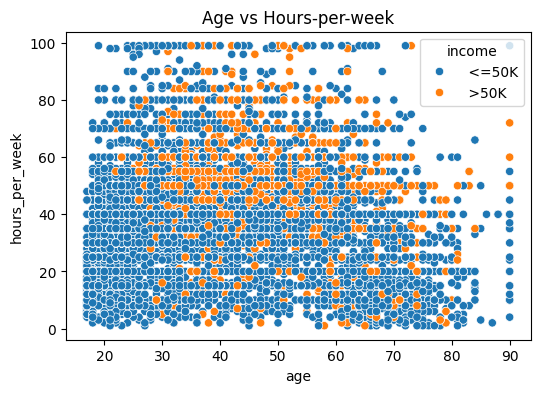

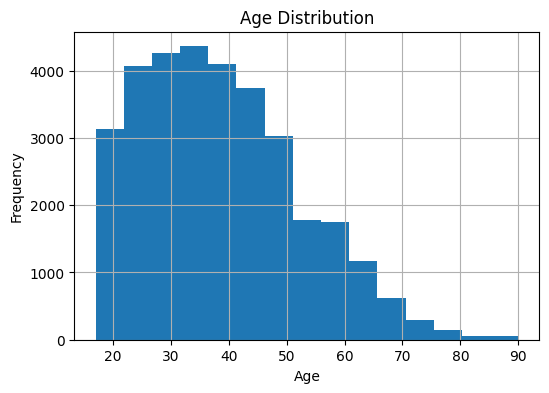

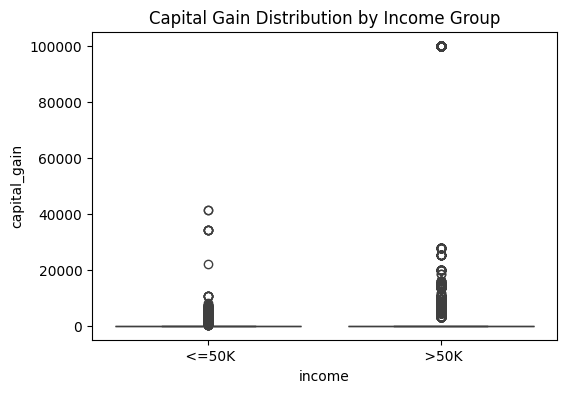

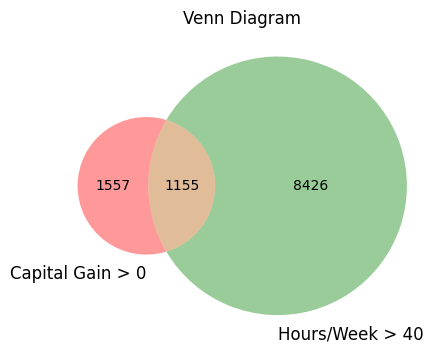

Data Summary:
                  age workclass relationship    race    sex  capital_gain  \
count   32561.000000     32561        32561   32561  32561  32561.000000   
unique           NaN         9            6       5      2           NaN   
top              NaN   Private      Husband   White   Male           NaN   
freq             NaN     22696        13193   27816  21790           NaN   
mean       38.581647       NaN          NaN     NaN    NaN   1077.648844   
std        13.640433       NaN          NaN     NaN    NaN   7385.292085   
min        17.000000       NaN          NaN     NaN    NaN      0.000000   
25%        28.000000       NaN          NaN     NaN    NaN      0.000000   
50%        37.000000       NaN          NaN     NaN    NaN      0.000000   
75%        48.000000       NaN          NaN     NaN    NaN      0.000000   
max        90.000000       NaN          NaN     NaN    NaN  99999.000000   

        capital_loss  hours_per_week  native_country  income  education_

In [3]:
if __name__ == "__main__":
    analyzer = IncomeDataAnalysis('./data/adult.data')
    analyzer.load_data()
    analyzer.clean_data()
    analyzer.normalize_education()
    analyzer.normalize_marital_status()
    analyzer.normalize_occupation()
    analyzer.convert_final_csv()
    analyzer.get_statistics()
    analyzer.plot_scatter_age_vs_hours()
    analyzer.age_distribution()
    analyzer.plot_box_capital_gain_by_income()
    analyzer.plot_venn_capital_gain_vs_hours()
    analyzer.get_summary()